In [7]:
import numpy as np
import syndat
import pandas as pd
import os
from matplotlib.pyplot import *
# import ATARI
from ATARI import PiTFAll as pf
import h5py
h5py.enable_ipython_completer()


In [8]:
%matplotlib widget

In [9]:
# Peformance Test for Fitting ALgorithm (PiTFALl)
# pd.__version__

In [10]:
# Initialize particle pair and quantup spin groups of interest

ac = 0.81271    # scattering radius in 1e-12 cm 
M = 180.948030  # amu of target nucleus
m = 1           # amu of incident neutron
I = 3.5         # intrinsic spin, positive parity
i = 0.5         # intrinsic spin, positive parity [sic: perhaps, angular momentum?]
l_max = 1       # highest order l-wave to consider

spin_groups = [ (3.0,1,0) ] # (4.0,1,0) 
average_parameters = pd.DataFrame({ 'dE'    :   {'3.0':8.79, '4.0':4.99},
                                    'Gg'    :   {'3.0':46.4, '4.0':35.5},
                                    'gn2'    :   {'3.0':64.0, '4.0':64.0}  })

Ta_pair = syndat.particle_pair( ac, M, m, I, i, l_max,
                                spin_groups=spin_groups, average_parameters=average_parameters,
                                input_options={})

In [11]:

# initialize experimental setup
E_min_max = [110, 150]
input_options = { 'Add Noise': True,
            'Sample TURP':True,
            'Sample TOCS':True, 
            'Calculate Covariance': True,
            'Compression Points':[],
            'Grouping Factors':None}

experiment_parameters = {'bw': {'val':0.1,    'unc'   :   0}}

exp = syndat.experiment(E_min_max, 
                        input_options=input_options, 
                        experiment_parameters=experiment_parameters)
print(len(exp.energy_domain))

349


In [12]:
# resonance_ladder = Ta_pair.sample_resonance_ladder(E_min_max, spin_groups, average_parameters)
# print(resonance_ladder)

# xs_tot, xs_scat, xs_cap = syndat.scattering_theory.SLBW(exp.energy_domain, Ta_pair, resonance_ladder)
# n = 0.067166 
# trans = np.exp(-n*xs_tot)
# trans_thick = np.exp(-0.5*xs_tot)
# theoretical_df = pd.DataFrame({'E':exp.energy_domain, 'theo_trans':trans})

# fig, ax = subplots(1,2, figsize=(10,4))
# ax[0].plot(exp.energy_domain, xs_tot)
# ax[0].set_title('Total Cross Section')
# ax[0].legend()

# ax[1].plot(theoretical_df.E, theoretical_df.theo_trans)
# ax[1].set_xscale('log')
# ax[1].set_ylim([0,1])
# ax[1].set_title('Transmission')

# fig.supxlabel('Energy (eV)')

In [13]:
# run a performance test with the PiTFAll module

# case_file = './perf_test_baron'
case_file = '/Users/noahwalton/Documents/GitHub/ATARI/Fitting/perf_test_baron.hdf5'
# case_file = '/Users/noahwalton/Documents/GitHub/ATARI/Fitting/perf_test_static_window_ladder.hdf5'
# case_file = './test.hdf5'

dataset_range = (0, 500)

# case_file = './perf_test_baron_rev2.hdf5'
# number_of_datasets = 27

path_to_application_exe = '/Applications/MATLAB_R2021b.app/bin/matlab'
path_to_fitting_script = "/Users/noahwalton/Documents/GitHub/ATARI/baron_fit_rev1.m"

# full_Ta181_RRR_JEFF = (4,2546)

vary_Erange = {'fullrange':(750,2546), 'maxres':5 , 'prob':0.001}
# vary_Erange = None

input_options = {   'Overwrite Syndats'    :   False, 
                    'Overwrite Fits'       :   False,
                    'Use HDF5'             :   True,
                    'Vary Erange'          :   vary_Erange} 



perf_test = pf.performance_test(dataset_range,
                                case_file,
                                input_options=input_options)

sample_data_df, out = perf_test.generate_syndats(Ta_pair, exp, 
                                                    solver='syndat_SLBW')
print(out)

User chose to NOT overwrite previously generated datasets in the file /Users/noahwalton/Documents/GitHub/ATARI/Fitting/perf_test_baron.hdf5.
Samples  0-500 already existed.
Samples 500-500 were generated.
If Syndat generation settings were changed these files should be overwriten.


In [14]:
# test = pd.DataFrame({'one':1,'two':2}, index=range(4,6))
# test
# np.count_nonzero(sample_data_df.NumRes.values>5)
# sample_data_df

In [15]:
# test accessing generated data
# sample_0 = pd.read_hdf(case_file, 'sample_0/syndat_par')
# sample_data_df = pd.read_hdf(case_file, 'test_stats/sample_data'


print(f"Average # Resonances: {np.mean(sample_data_df.NumRes)}")
print(f"Min/Max # Resonances: {np.min(sample_data_df.NumRes)}/{np.max(sample_data_df.NumRes)}")

print(f"Average Energy Points: {np.mean(sample_data_df.NumEpts)}")
print(f"Min/Max Energy Points: {np.min(sample_data_df.NumEpts)}/{np.max(sample_data_df.NumEpts)}")

print(f"Min theoretical SE: {np.min(sample_data_df.theo_exp_SE)}")

# sample_0

Average # Resonances: 3.304
Min/Max # Resonances: 1/7
Average Energy Points: 36.372
Min/Max Energy Points: 15/88
Min theoretical SE: 0.020499429824151323


In [16]:
out = perf_test.generate_fits(False)
print(out)

User chose to NOT run the fitting algorithm locally.
The data file /Users/noahwalton/Documents/GitHub/ATARI/Fitting/perf_test_baron.hdf5 has been prepared based on the selected overwrite options.
Please run samples 0-500


In [17]:
# f = h5py.File(case_file, 'r+')
# # del f['sample_0']['fit_par']
# # print(f['sample_0/est_par_baron'])
# # print(f['sample_10/exp_cov'][()])
# print(f['sample_0'].keys())
# # print(f['test_stats/sample_data'].keys())
# f.close()
# # pd.read_hdf(case_file, 'sample_0/exp_pw')
# # pd.read_hdf(case_file, 'sample_0/theo_par')

In [18]:
integral_FoMs_baron_rev1, integral_par_FoMs_baron_rev1, bv_pw_inwindow_baron_rev1, syndat_data_baron_rev1, printout_baron_rev1 = perf_test.analyze(Ta_pair, exp, 'baron')
integral_FoMs_baron_rev2, integral_par_FoMs_baron_rev2, bv_pw_inwindow_baron_rev2, syndat_data_baron_rev2, printout_baron_rev2 = perf_test.analyze(Ta_pair, exp, 'baron_rev2')
integral_FoMs_pswarm_rev1, integral_par_FoMs_pswarm_rev1, bv_pw_inwindow_pswarm_rev1, syndat_data_pswarm_rev1, printout_pswarm_rev1 = perf_test.analyze(Ta_pair, exp, 'pswarm_rev1')
# pd.read_hdf(case_file, 'integral_FoMs')

In [19]:
print(printout_baron_rev1); print()
print(printout_baron_rev2); print()
print(printout_pswarm_rev1); print()

The mean/std of the fit to experimental chi2/dof is 25.21331871123264 +/- 213.97766995605798 in transmission space.
The mean/std of the fit to theorectical MSE is 14914.921089624615 +/- 39336.50758708859 in cross section space.

The mean/std of the fit to experimental chi2/dof is 7.2415237251430655 +/- 34.125622890001814 in transmission space.
The mean/std of the fit to theorectical MSE is 28523.290709343237 +/- 53191.869532006844 in cross section space.

The mean/std of the fit to experimental chi2/dof is 0.9436749158418145 +/- 1.2698123673551858 in transmission space.
The mean/std of the fit to theorectical MSE is 15040.993127323254 +/- 17858.758855211385 in cross section space.



### Histogram of FoMs - add box plot

In [20]:
print(integral_FoMs_baron_rev1.keys()) 

Index(['fit_theo_MSE', 'fit_exp_SE', 'fit_exp_chi2', 'fit_exp_chi2dof',
       'theo_exp_SE', 'theo_exp_chi2', 'theo_exp_chi2dof', 'tfit'],
      dtype='object')


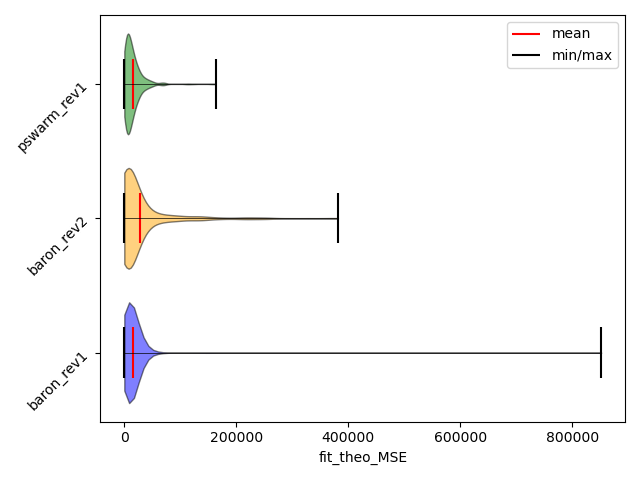

In [21]:
fom = 'fit_theo_MSE'
bins = 100
# bins = np.linspace(0,30, bins)

violin_data = [integral_FoMs_baron_rev1[fom], integral_FoMs_baron_rev2[fom], integral_FoMs_pswarm_rev1[fom]]
violin_labels = ['baron_rev1', 'baron_rev2', 'pswarm_rev1']
violin_colors = ['blue', 'orange', 'green']

fig = pf.pf_plot.violin(violin_data, violin_labels, violin_colors, fom)


### Histogram for bias/variance over a window

In [22]:
print(bv_pw_inwindow_baron_rev1.keys()) 

Index(['WE_midpoint', 'window_bias_xs', 'window_bias_trans',
       'window_variance_xs', 'window_variance_trans'],
      dtype='object')


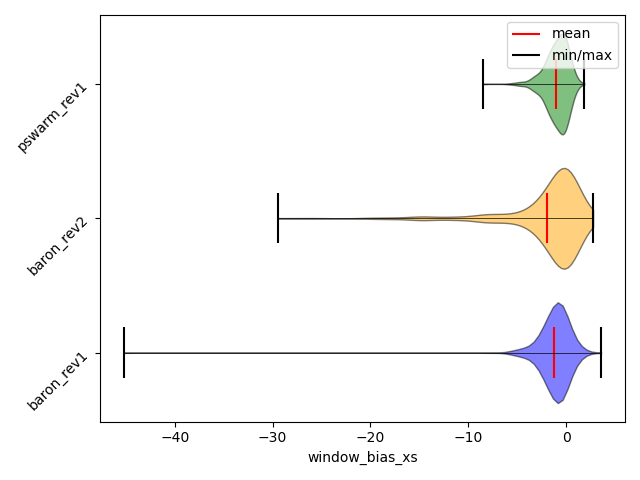

In [23]:
fom = 'window_bias_xs'


violin_data = [bv_pw_inwindow_baron_rev1[fom], bv_pw_inwindow_baron_rev2[fom], bv_pw_inwindow_pswarm_rev1[fom]]
violin_labels = ['baron_rev1', 'baron_rev2', 'pswarm_rev1']
violin_colors = ['blue', 'orange', 'green']

fig = pf.pf_plot.violin(violin_data, violin_labels, violin_colors, fom)

### Trends

In [24]:
# to plot FoMs per other FoMs, either join the above dfs, or do some sort of index filtering
joined_df_baron_rev1 = pd.concat([integral_FoMs_baron_rev1, 
                                  integral_par_FoMs_baron_rev1,
                                  bv_pw_inwindow_baron_rev1,
                                  syndat_data_baron_rev1],      axis=1)

joined_df_baron_rev2 = pd.concat([integral_FoMs_baron_rev2, 
                                  integral_par_FoMs_baron_rev2,
                                  bv_pw_inwindow_baron_rev2,
                                  syndat_data_baron_rev2],      axis=1)

joined_df_pswarm_rev1 = pd.concat([integral_FoMs_pswarm_rev1, 
                                   integral_par_FoMs_pswarm_rev1,
                                   bv_pw_inwindow_pswarm_rev1,
                                   syndat_data_pswarm_rev1],    axis=1)


[print(each) for each in joined_df_baron_rev1.keys()];

fit_theo_MSE
fit_exp_SE
fit_exp_chi2
fit_exp_chi2dof
theo_exp_SE
theo_exp_chi2
theo_exp_chi2dof
tfit
est_card
est_avg_Gg
est_avg_gnx2
est_min_Gg
est_min_gnx2
est_max_Gg
est_max_gnx2
WE_midpoint
window_bias_xs
window_bias_trans
window_variance_xs
window_variance_trans
NumRes
NumEpts
theo_exp_SE
theo_avg_gnx2
theo_avg_Gg
theo_min_gnx2
theo_min_Gg
theo_max_gnx2
theo_max_Gg


Text(0.5, 0, 'window_bias_xs')

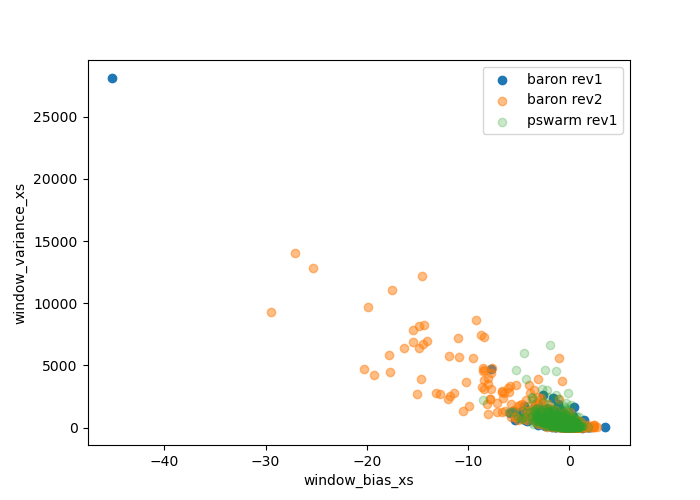

In [25]:
x = 'window_bias_xs'
y = 'window_variance_xs'

figure(figsize=(7,5))
scatter(joined_df_baron_rev1[x], joined_df_baron_rev1[y], label='baron rev1')
scatter(joined_df_baron_rev2[x], joined_df_baron_rev2[y], label='baron rev2',alpha=0.5)
scatter(joined_df_pswarm_rev1[x], joined_df_pswarm_rev1[y], label='pswarm rev1',alpha=0.25)
legend()
ylabel(y)
xlabel(x)

### Correlations

In [26]:
# FoM_of_interest = ['tfit', 'fit_theo_MSE', 'fit_exp_chi2', 'theo_exp_chi2', 'window_bias_xs','window_variance_xs', 'NumEpts','NumRes', 'est_card', \
#                    'est_avg_Gg', 'est_avg_gnx2', 'est_min_Gg', 'est_min_gnx2','est_max_Gg', 'est_max_gnx2', \
#                    'theo_avg_Gg', 'theo_avg_gnx2', 'theo_min_Gg', 'theo_min_gnx2', 'theo_max_Gg', 'theo_max_gnx2']
FoM_of_interest = ['tfit', 'fit_theo_MSE', \
                   'est_avg_Gg', 'est_avg_gnx2', 'est_min_Gg', 'est_min_gnx2','est_max_Gg', 'est_max_gnx2', \
                   'theo_avg_Gg', 'theo_avg_gnx2', 'theo_min_Gg', 'theo_min_gnx2', 'theo_max_Gg', 'theo_max_gnx2']
filtered_joined_df_baron_rev1 = joined_df_baron_rev1[FoM_of_interest]
filtered_joined_df_baron_rev2 = joined_df_baron_rev2[FoM_of_interest]
filtered_joined_df_pswarm_rev1 = joined_df_pswarm_rev1[FoM_of_interest]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


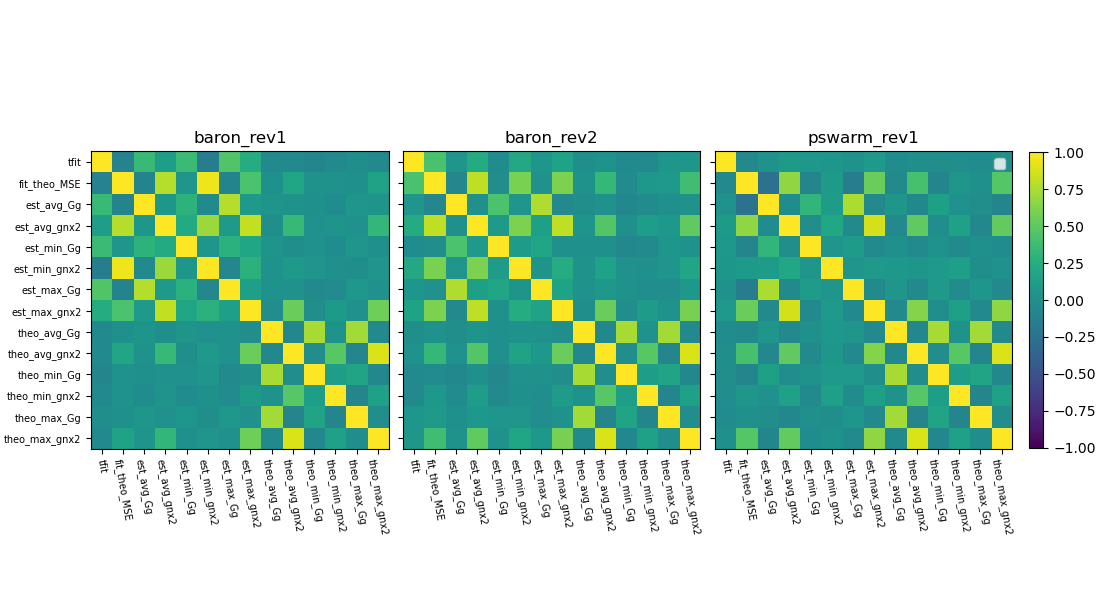

In [27]:
correlation_baron_rev1 = filtered_joined_df_baron_rev1.corr()
correlation_baron_rev2 = filtered_joined_df_baron_rev2.corr()
correlation_pswarm_rev1 = filtered_joined_df_pswarm_rev1.corr()

fig, ax = subplots(1,3, figsize=(11,6), sharey=True, constrained_layout=True)


im1 = ax[0].imshow(correlation_baron_rev1, vmin=-1, vmax=1); ax[0].set_title('baron_rev1')
im2 = ax[1].imshow(correlation_baron_rev2, vmin=-1, vmax=1); ax[1].set_title('baron_rev2')
im3 = ax[2].imshow(correlation_pswarm_rev1, vmin=-1, vmax=1); ax[2].set_title('pswarm_rev1')

from mpl_toolkits.axes_grid1 import make_axes_locatable

for axis in ax:
    axis.set_xticks(range(len(filtered_joined_df_pswarm_rev1.keys())))
    axis.set_xticklabels([filtered_joined_df_pswarm_rev1.keys()[i] for i in range(len(filtered_joined_df_pswarm_rev1.keys()))], fontsize=7, rotation=-80)
    axis.set_yticks(range(len(filtered_joined_df_pswarm_rev1.keys())))
    axis.set_yticklabels([filtered_joined_df_pswarm_rev1.keys()[i] for i in range(len(filtered_joined_df_pswarm_rev1.keys()))], fontsize=7, rotation=0)

    # divider = make_axes_locatable(axis)
    # cax = divider.append_axes("right", size="5%", pad=0.05)
    # colorbar(im3, cax=cax)

# fig.subplots_adjust(wspace=0.1)
fig.colorbar(im2, ax=ax[2], shrink=0.5)
legend()
# tight_layout()

# divider = make_axes_locatable(ax[2])
# cax = divider.append_axes("right", size="5%", pad=0.05)
# colorbar(im3, cax=cax)

# cb.set_clim(-1.0, 1.0)
# cb.ax.tick_params(labelsize=10)
# title('FoM Correlation', fontsize=10)

### Other statistics

In [28]:
print("Fits with a smaller exp_chi2 than True:")
print(f"baron_rev1: {np.count_nonzero(integral_FoMs_baron_rev1['fit_exp_chi2']<integral_FoMs_baron_rev1['theo_exp_chi2'])/len(integral_FoMs_baron_rev1)}" )
print(f"baron_rev2: {np.count_nonzero(integral_FoMs_baron_rev2['fit_exp_chi2']<integral_FoMs_baron_rev2['theo_exp_chi2'])/len(integral_FoMs_baron_rev2)}" )
print(f"pswarm_rev1: {np.count_nonzero(integral_FoMs_pswarm_rev1['fit_exp_chi2']<integral_FoMs_pswarm_rev1['theo_exp_chi2'])/len(integral_FoMs_pswarm_rev1)}" )
print()
print("Fits with a smaller exp_SE than True:")
print(f"baron_rev1: {np.count_nonzero(integral_FoMs_baron_rev1['fit_exp_SE']<integral_FoMs_baron_rev1['theo_exp_SE'])/len(integral_FoMs_baron_rev1)}" )
print(f"baron_rev2: {np.count_nonzero(integral_FoMs_baron_rev2['fit_exp_SE']<integral_FoMs_baron_rev2['theo_exp_SE'])/len(integral_FoMs_baron_rev2)}" )
print(f"pswarm_rev1: {np.count_nonzero(integral_FoMs_pswarm_rev1['fit_exp_SE']<integral_FoMs_pswarm_rev1['theo_exp_SE'])/len(integral_FoMs_pswarm_rev1)}" )
print()


Fits with a smaller exp_chi2 than True:
baron_rev1: 0.83
baron_rev2: 0.292
pswarm_rev1: 0.848

Fits with a smaller exp_SE than True:
baron_rev1: 0.83
baron_rev2: 0.298
pswarm_rev1: 0.854



### Interrogate individual cases

In [29]:
integral_FoMs_baron_rev1

,fit_theo_MSE,fit_exp_SE,fit_exp_chi2,fit_exp_chi2dof,theo_exp_SE,theo_exp_chi2,theo_exp_chi2dof,tfit
isample,,,,,,,,
0,24953.852382,0.139878,34.947434,0.759727,0.163063,45.207605,0.982774,907.884063
1,8403.350483,0.013958,4.550193,0.206827,0.043518,15.349230,0.697692,903.574073
2,6250.545299,0.065637,18.844813,0.628160,0.104181,32.563485,1.085450,902.727513
3,6030.137026,0.025937,4.764427,0.238221,0.049216,15.613655,0.780683,903.775054
4,13375.926468,0.036514,11.352588,0.391469,0.074506,24.158529,0.833053,904.495847
...,...,...,...,...,...,...,...,...
495,23266.208971,0.103771,23.456364,0.601445,0.165604,42.544184,1.090877,904.411559
496,13699.285148,0.016348,5.167612,0.303977,0.068127,21.359453,1.256438,902.158714
497,30565.255586,0.225812,42.597826,0.946618,0.235436,64.270705,1.428238,905.135550


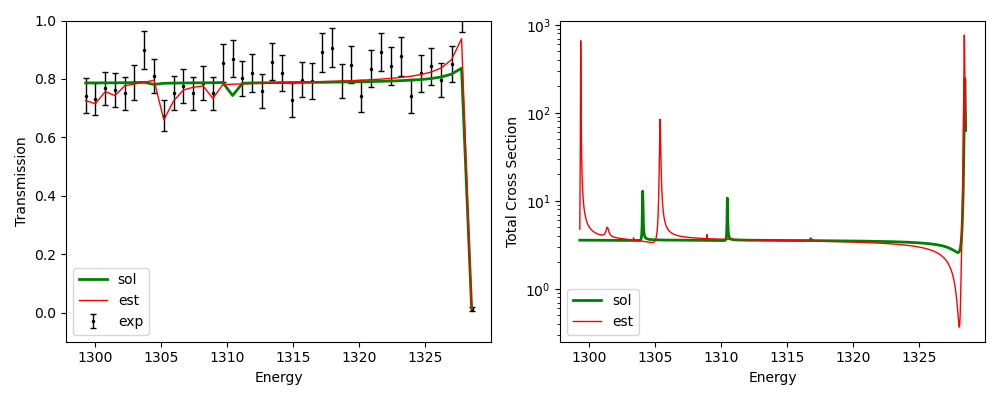

In [30]:
fig = pf.sample_case.plot(case_file, 495, 'baron')

### Next steps

1) Analyze statistics on resonance parameters

    a) how do we quantify missing or misassigned resonances?
    
    b) can we build a correlation between accuracy and width? perhaps energy resolution should be considered.

2) Incude relationship between magnitude of unc/correlation and fit

3) maybe look at variance in theo or est resonance parameters rather than average/min/max

4) do a performance test without a moving window, and/or with a constant resonance ladder. These will allow for different performance metrics to be built such as:
    a) Bias-variance plot with a different interpretation
    b) Influence of energy points per resonance (different that #epts/#res, must consider the width of influence per resonance)
    c) Quantification of performance as it relates to location within the window without - though this analysis could be done in the above examples but we would need to parameterize the location within the window since erange and epts are changing... perhaps relative distance from centerpoint

5) do not recalculate integral FoM's if they are already calculated and saved in case file

### Dev code below

Improvements:
- store (exp.redpar - exp.theo_redpar) for each sample to see effects of large changes in true underlying reduction parameters
- characterize relationship between pw FoMs and resonance widths/location
- compare est/theo parameter dataframes 
- 

             E         Gg        gnx2    J  chs  lwave  J_ID
0  2161.546857  44.543650   39.035597  3.0  1.0    0.0   1.0
1  2172.059764  43.792495  157.228518  3.0  1.0    0.0   1.0
2  2177.546682  46.816028   43.557035  3.0  1.0    0.0   1.0
3  2180.568035  50.148536   17.263849  3.0  1.0    0.0   1.0
             E          Gg        gnx2
0  2160.945307  221.237073  316.723226
1  2161.558647   36.067090   20.775109
2  2166.402097    0.000000  155.633495
3  2176.283771   91.101460  302.141176


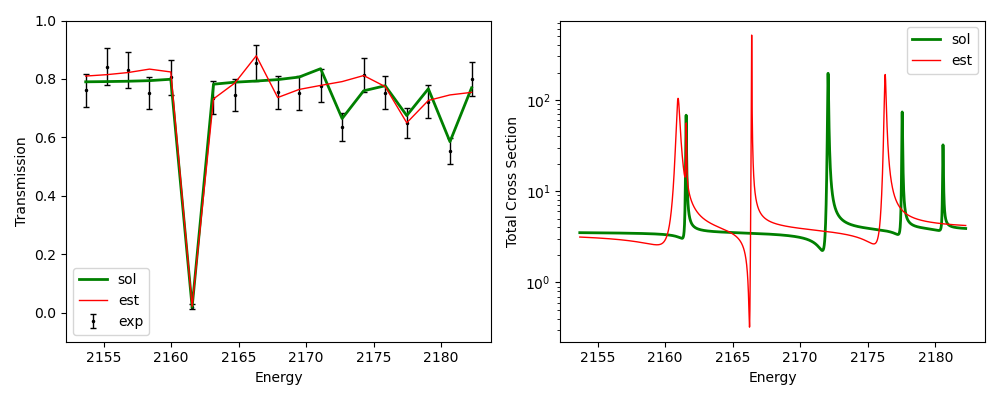

In [31]:
fit_name = 'pswarm_rev1'
isample = 81

fig = pf.sample_case.plot(case_file, isample, fit_name)

exp_pw_df, theo_pw_df, theo_par_df, est_par_df, exp_cov = pf.sample_case.read_sample_case_data(case_file, isample, fit_name)

# trans = np.exp(-0.06*theo_pw_df.theo_xs)
# figure()
# plot(theo_pw_df.E, trans)

est_par_df_nonzero = est_par_df.loc[est_par_df['gnx2']>0.0, 'E':'gnx2']
theo_par_df.sort_values('E', ignore_index=True, inplace=True)
est_par_df_nonzero.sort_values('E', ignore_index=True, inplace=True)


print(theo_par_df)
# print(est_par_df) 
print(est_par_df_nonzero)

### Interrogate Chi2 and MSE per eV

In [32]:
theo_pw_df.est_xs_pswarm_rev1

0       3.142097
1       3.141627
2       3.141157
3       3.140685
4       3.140213
          ...   
2852    4.208249
2853    4.207437
2854    4.206627
2855    4.205820
2856    4.205015
Name: est_xs_pswarm_rev1, Length: 2857, dtype: float64

### Fit to True Convolution

In [33]:
# np.arange(-len(theo_pw_df.theo_xs) + 1, len(xs_tot))

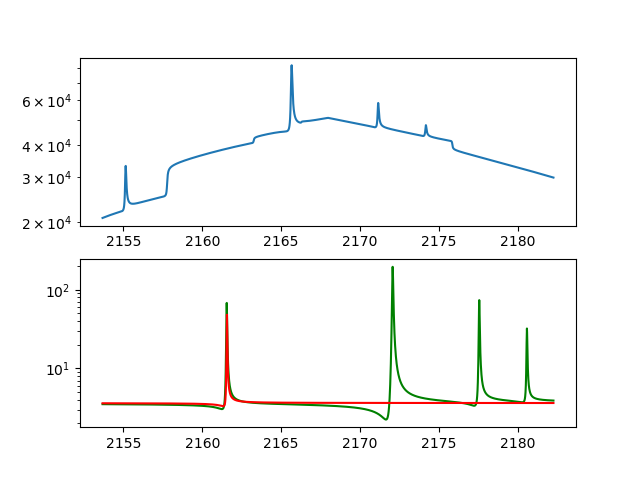

In [50]:
from scipy import signal

# for i in range(len(est_par_df_nonzero)):
i = 1
single_resonance_df = pf.sample_case.take_syndat_spingroups(theo_par_df, est_par_df_nonzero.loc[[i]])

minE = single_resonance_df.E-(single_resonance_df.gnx2+single_resonance_df.Gg)*5e-3
maxE = single_resonance_df.E+(single_resonance_df.gnx2+single_resonance_df.Gg)*5e-3
E_pm_3Gggnx2 = theo_pw_df.E[ (theo_pw_df.E > minE.item()) & (theo_pw_df.E < maxE.item())]

xs_tot, xs_scat, xs_cap = syndat.scattering_theory.SLBW(theo_pw_df.E, Ta_pair, single_resonance_df)
theo_pw_df_filtered = theo_pw_df[ (theo_pw_df.E > minE.item()) & (theo_pw_df.E < maxE.item())]

energies = [theo_pw_df.E,theo_pw_df.E] # E_pm_3Gggnx2] #
signals = [theo_pw_df.theo_xs, xs_tot]# theo_pw_df.est_xs_pswarm_rev1]

# convolution = signal.fftconvolve(theo_pw_df.theo_xs, xs_tot, 'same')
convolution = signal.fftconvolve(signals[0], signals[1], 'same')

# convolution = signal.correlate(theo_pw_df.theo_xs, xs_tot, 'full')
lags = signal.correlation_lags(len(signals[1]), len(signals[0]))
# convolution = signal.fftconvolve(theo_pw_df.theo_xs, theo_pw_df_filtered.est_xs_pswarm_rev1, 'same')

fig, ax = subplots(2,1, sharex=False)

# ax[0].plot(lags, convolution)
ax[0].plot(energies[0], convolution)
ax[0].set_yscale('log')

ax[1].plot(energies[0], signals[0], 'g')
ax[1].plot(energies[1], signals[1], 'r')
ax[1].set_yscale('log')
# ax[1].plot(theo_pw_df_filtered.E, theo_pw_df_filtered.est_xs_pswarm_rev1, 'r')

# plot(np.linspace(1428.5, 4285.5,2857), signal.fftconvolve(theo_pw_df.theo_xs, xs_tot, 'same'), 'o')
# # plot(signal.fftconvolve(theo_pw_df.theo_xs, xs_tot, 'full'))


### True to fit convolution

In [35]:
theo_par_df.loc[[i]]

,E,Gg,gnx2,J,chs,lwave,J_ID
1,2172.059764,43.792495,157.228518,3.0,1.0,0.0,1.0


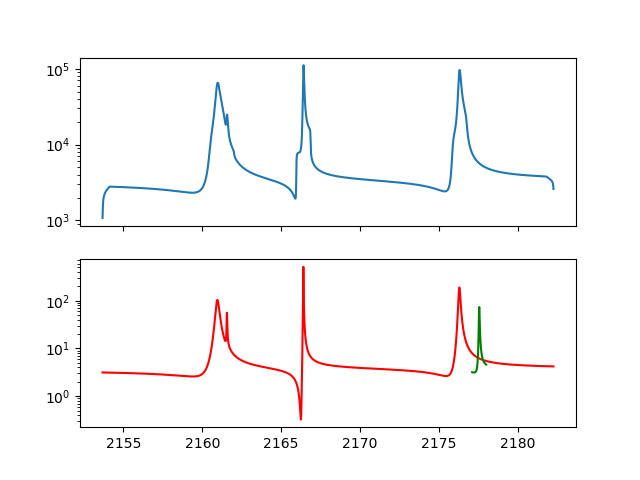

In [36]:

# for i in range(len(est_par_df_nonzero)):
i = 2
single_resonance_df = theo_par_df.loc[[i]]

minE = single_resonance_df.E-(single_resonance_df.gnx2+single_resonance_df.Gg)*5e-3
maxE = single_resonance_df.E+(single_resonance_df.gnx2+single_resonance_df.Gg)*5e-3
E_pm_3Gggnx2 = theo_pw_df.E[ (theo_pw_df.E > minE.item()) & (theo_pw_df.E < maxE.item())]

xs_tot, xs_scat, xs_cap = syndat.scattering_theory.SLBW(E_pm_3Gggnx2, Ta_pair, single_resonance_df)


convolution = signal.fftconvolve(theo_pw_df.est_xs_pswarm_rev1, xs_tot, 'same')
fig, ax = subplots(2,1, sharex=True)
ax[0].plot(theo_pw_df.E, convolution)
ax[0].set_yscale('log')

ax[1].plot(theo_pw_df.E, theo_pw_df.est_xs_pswarm_rev1, 'r')
ax[1].plot(E_pm_3Gggnx2, xs_tot, 'g')
# ax[1].plot(theo_pw_df.E, theo_pw_df.theo_xs, 'g')
ax[1].set_yscale('log')

In [37]:
window_cardinality_difference = len(theo_par_df.E) - len(est_par_df_nonzero.E)
print(window_cardinality_difference)
print(theo_par_df.E - est_par_df_nonzero.E)


0
0     0.601551
1    10.501118
2    11.144585
3     4.284263
Name: E, dtype: float64


In [38]:
exp_pw_df, theo_pw_df, theo_par_df, est_par_df, exp_cov = pf.sample_case.read_sample_case_data(case_file, isample, fit_name)

avg_gnx2 = np.mean(est_par_df.gnx2)
avg_Gg = np.mean(est_par_df.Gg)

In [39]:
# xs_tot_syndat, xs_tot_fit, new_egrid = pf.sample_case.calculate_xs(pw_data.E, Ta_pair, syndat_par_df, fit_par_df, True)

# n = exp.redpar.val.n  # atoms per barn or atoms/(1e-12*cm^2)
# trans_fit = np.exp(-n*xs_tot_fit)
# trans_syndat = np.exp(-n*xs_tot_syndat)

# from scipy import integrate
# est_sol_SE = integrate.trapezoid((xs_tot_syndat-xs_tot_fit)**2, new_egrid)
# print(est_sol_SE)

# print(syndat_par_df)
# print(fit_par_df)

# fig, ax = subplots(1,2, figsize=(10,4))
# ax[0].plot(new_egrid, xs_tot_fit)
# ax[0].plot(new_egrid, xs_tot_syndat)
# ax[0].set_yscale('log')

# ax[1].plot(new_egrid, trans_fit, 'r')
# ax[1].plot(new_egrid, trans_syndat, 'g')